In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\khan\AppData\Local\Temp\ipykernel_13564\958043555.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


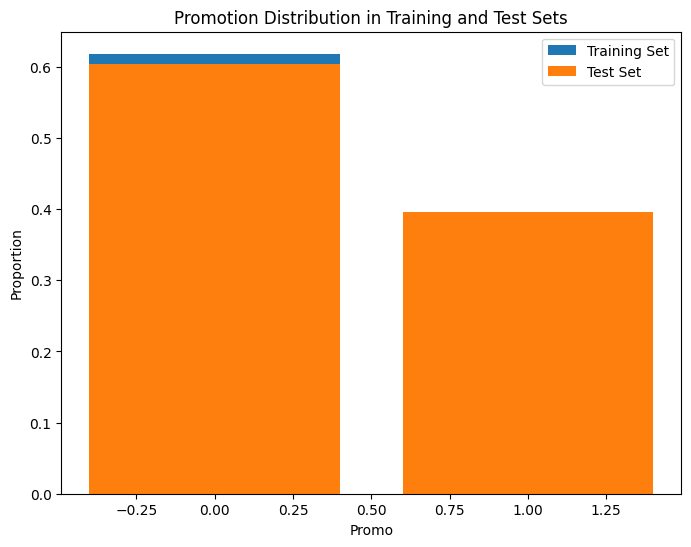

Training Set Promotion Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set Promotion Distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


In [49]:
train_df = pd.read_csv('train.csv')

# Load the test data
test_df = pd.read_csv('test.csv')

# Calculate promotion distribution in the training set
train_promo_dist = train_df['Promo'].value_counts(normalize=True)

# Calculate promotion distribution in the test set
test_promo_dist = test_df['Promo'].value_counts(normalize=True)

# Create a bar chart to compare distributions
plt.figure(figsize=(8, 6))
plt.bar(train_promo_dist.index, train_promo_dist.values, label='Training Set')
plt.bar(test_promo_dist.index, test_promo_dist.values, label='Test Set')

# Add labels and title
plt.xlabel('Promo')
plt.ylabel('Proportion')
plt.title('Promotion Distribution in Training and Test Sets')
plt.legend()

# Show the plot
plt.show()

# Print the distributions for comparison
print("Training Set Promotion Distribution:")
print(train_promo_dist)
print("\nTest Set Promotion Distribution:")
print(test_promo_dist)


C:\Users\khan\AppData\Local\Temp\ipykernel_13564\1758377554.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('train.csv')


count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
Correlation between Sales and Promo: 0.4523447198240351


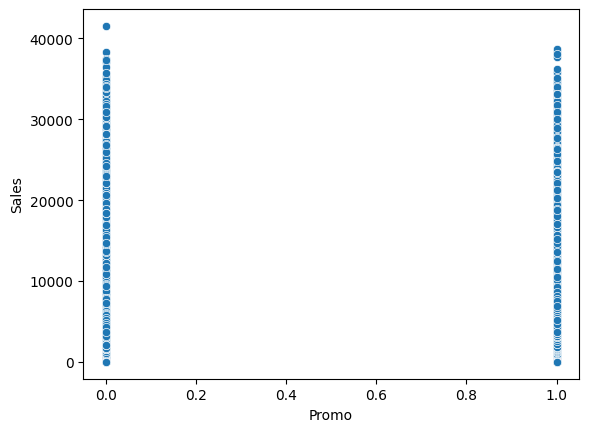

In [12]:
df1 = pd.read_csv('store.csv')
df2 = pd.read_csv('train.csv')
merged_df = pd.merge(df1, df2, on='Store', how='left')
merged_df.fillna(0, inplace=True)
print(merged_df['Sales'].describe())
correlation = merged_df['Sales'].corr(merged_df['Promo'])
print(f"Correlation between Sales and Promo: {correlation}")
sns.scatterplot(x='Promo', y='Sales', data=merged_df)
plt.show()


C:\Users\khan\AppData\Local\Temp\ipykernel_13564\3543602862.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('train.csv')


count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
Correlation between Sales and CompetitionOpenSinceYear: 0.002749181634847202


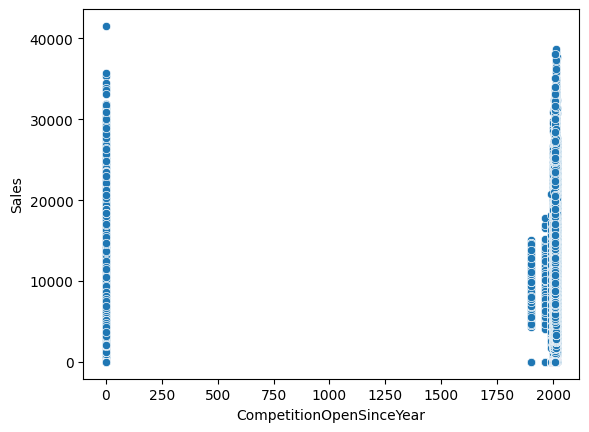

In [13]:
df1 = pd.read_csv('store.csv')
df2 = pd.read_csv('train.csv')
merged_df = pd.merge(df1, df2, on='Store', how='left')
merged_df.fillna(0, inplace=True)
print(merged_df['Sales'].describe())
correlation = merged_df['Sales'].corr(merged_df['CompetitionOpenSinceYear'])
print(f"Correlation between Sales and CompetitionOpenSinceYear: {correlation}")
sns.scatterplot(x='CompetitionOpenSinceYear', y='Sales', data=merged_df)
plt.show()


C:\Users\khan\AppData\Local\Temp\ipykernel_13564\1775137907.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


Training Set Promotion Rate: 38.15%
Test Set Promotion Rate: 39.58%


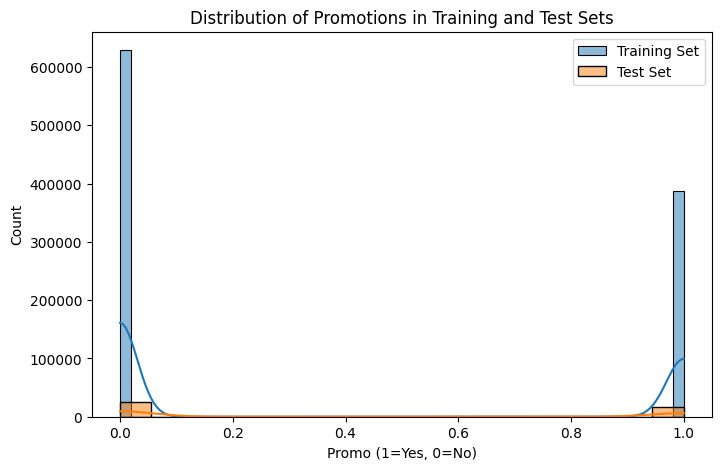

In [15]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_promotion_rate = train_data['Promo'].mean()
test_promotion_rate = test_data['Promo'].mean()

print(f"Training Set Promotion Rate: {train_promotion_rate:.2%}")
print(f"Test Set Promotion Rate: {test_promotion_rate:.2%}")
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Promo'], label='Training Set', kde=True)
sns.histplot(test_data['Promo'], label='Test Set', kde=True)
plt.xlabel('Promo (1=Yes, 0=No)')
plt.ylabel('Count')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.legend()
plt.show()

C:\Users\khan\AppData\Local\Temp\ipykernel_13564\1863958554.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


Average Sales Before Holidays: 5773.82
Average Sales During Holidays: nan
Average Sales After Holidays: nan


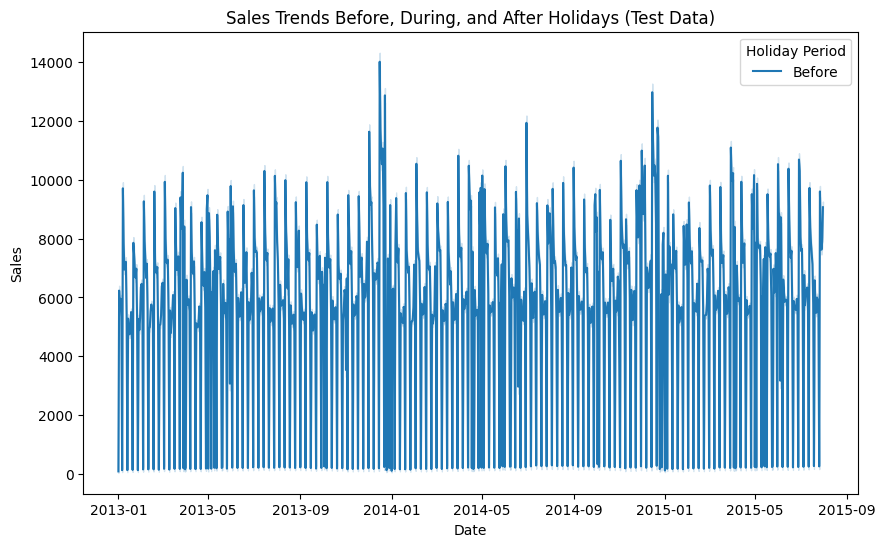

In [24]:
train_df = pd.read_csv('train.csv')

# Convert 'date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Define holiday dates
holidays = ['2023-12-25', '2023-01-01', '2023-11-23']
holidays = [pd.to_datetime(date) for date in holidays]

# Create 'Holiday Period' column
def get_holiday_period(date):
    for holiday in holidays:
        if date == holiday:
            return 'During'
        elif date < holiday:
            return 'Before'
    return 'After'

train_df['Holiday Period'] = train_df['Date'].apply(get_holiday_period)

# Calculate average sales for each holiday period
average_sales_before = train_df[train_df['Holiday Period'] == 'Before']['Sales'].mean()
average_sales_during = train_df[train_df['Holiday Period'] == 'During']['Sales'].mean()
average_sales_after = train_df[train_df['Holiday Period'] == 'After']['Sales'].mean()

print(f"Average Sales Before Holidays: {average_sales_before:.2f}")
print(f"Average Sales During Holidays: {average_sales_during:.2f}")
print(f"Average Sales After Holidays: {average_sales_after:.2f}")

# Visualize sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Sales', data=train_df, hue='Holiday Period')
plt.title('Sales Trends Before, During, and After Holidays (Test Data)')
plt.show()


C:\Users\khan\AppData\Local\Temp\ipykernel_13564\2264566728.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


Average Sales During Christmas: 168.73
Average Sales During Easter: 214.31
Average Sales During Other Periods: 5833.61


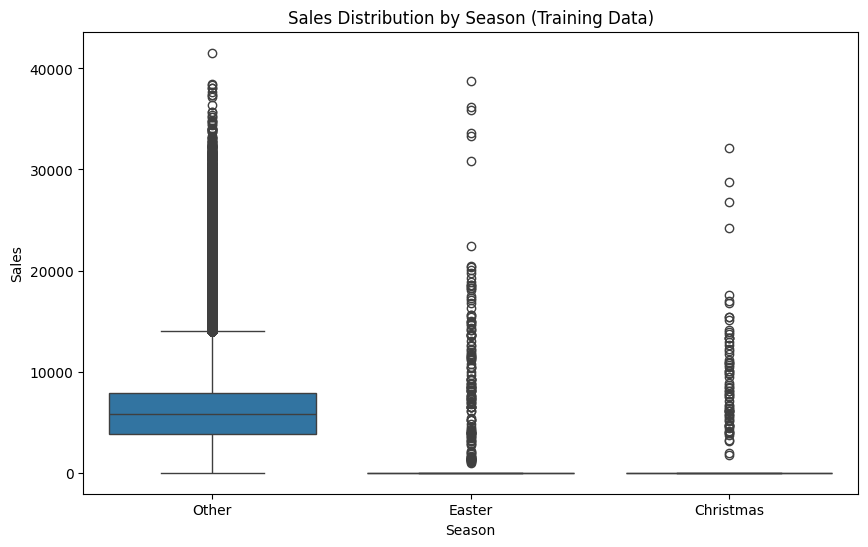

In [26]:
train_df = pd.read_csv('train.csv')

# Convert 'date' column to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Create a 'Season' column based on StateHoliday
train_df['Season'] = train_df['StateHoliday'].apply(lambda x: 'Christmas' if x == 'c' else ('Easter' if x == 'b' else 'Other'))

# Calculate average sales for each season
average_sales_christmas = train_df[train_df['Season'] == 'Christmas']['Sales'].mean()
average_sales_easter = train_df[train_df['Season'] == 'Easter']['Sales'].mean()
average_sales_other = train_df[train_df['Season'] == 'Other']['Sales'].mean()

print(f"Average Sales During Christmas: {average_sales_christmas:.2f}")
print(f"Average Sales During Easter: {average_sales_easter:.2f}")
print(f"Average Sales During Other Periods: {average_sales_other:.2f}")

# Visualize sales trends by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Sales', data=train_df)
plt.title('Sales Distribution by Season (Training Data)')
plt.show()

C:\Users\khan\AppData\Local\Temp\ipykernel_13564\470168570.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


Correlation between Sales and Customers: 0.89


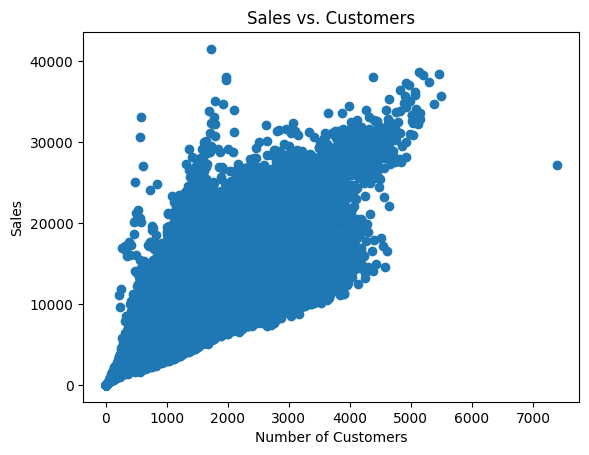

In [29]:
data = pd.read_csv('train.csv')
correlation = data['Sales'].corr(data['Customers'])

print(f"Correlation between Sales and Customers: {correlation:.2f}")
import matplotlib.pyplot as plt

plt.scatter(data['Customers'], data['Sales'])
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Sales vs. Customers')
plt.show()

In [30]:
avg_customers_promo = data[data['Promo'] == 1]['Customers'].mean()

# Calculate average customers without promotions
avg_customers_no_promo = data[data['Promo'] == 0]['Customers'].mean()

print(f"Average Customers During Promotions: {avg_customers_promo:.2f}")
print(f"Average Customers Without Promotions: {avg_customers_no_promo:.2f}")

Average Customers During Promotions: 820.10
Average Customers Without Promotions: 517.82


In [34]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Extract day of the week
train_df['DayOfWeek'] = train_df['Date'].dt.dayofweek

# Identify stores open on all weekdays (Monday to Friday)
stores_open_weekdays = train_df[train_df['DayOfWeek'].isin(range(5))]['Store'].unique()

# Identify stores open on weekends (Saturday and Sunday)
stores_open_weekends = train_df[train_df['DayOfWeek'].isin([5, 6])]['Store'].unique()

# Find stores open on both weekdays and weekends
stores_open_all_days = set(stores_open_weekdays).intersection(set(stores_open_weekends))

# Calculate average weekday sales for stores open on all days
weekday_sales_open_all_days = train_df[
    (train_df['DayOfWeek'].isin(range(5))) & (train_df['Store'].isin(stores_open_all_days))
]['Sales'].mean()

# Calculate average weekend sales for stores open on all days
weekend_sales_open_all_days = train_df[
    (train_df['DayOfWeek'].isin([5, 6])) & (train_df['Store'].isin(stores_open_all_days))
]['Sales'].mean()

print(f"Stores open on all days (weekdays and weekends): {stores_open_all_days}")
print(f"Average weekday sales for stores open on all days: {weekday_sales_open_all_days:.2f}")
print(f"Average weekend sales for stores open on all days: {weekend_sales_open_all_days:.2f}")
stores_open_weekdays = train_df[train_df['DayOfWeek'].isin(range(5))]['Store'].unique()

print(f"Stores open on all weekdays: {stores_open_weekdays}")


Stores open on all days (weekdays and weekends): {np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int6

C:\Users\khan\AppData\Local\Temp\ipykernel_13564\791108322.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


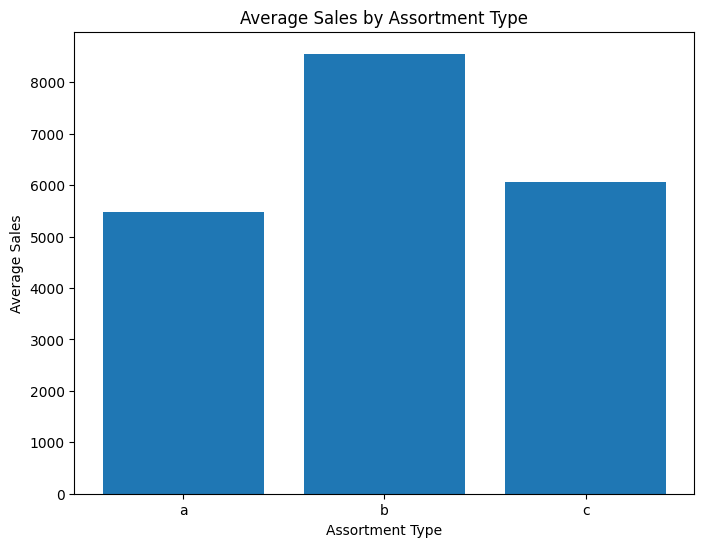

In [37]:
store_df = pd.read_csv('store.csv')

# Load the training data
train_df = pd.read_csv('train.csv')

# Merge the DataFrames on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store')

# Group by Assortment Type and calculate average sales
average_sales_by_assortment = merged_df.groupby('Assortment')['Sales'].mean()

print(average_sales_by_assortment)
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(average_sales_by_assortment.index, average_sales_by_assortment.values)

# Add labels and title
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.title('Average Sales by Assortment Type')

# Show the plot
plt.show()



C:\Users\khan\AppData\Local\Temp\ipykernel_13564\794437175.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


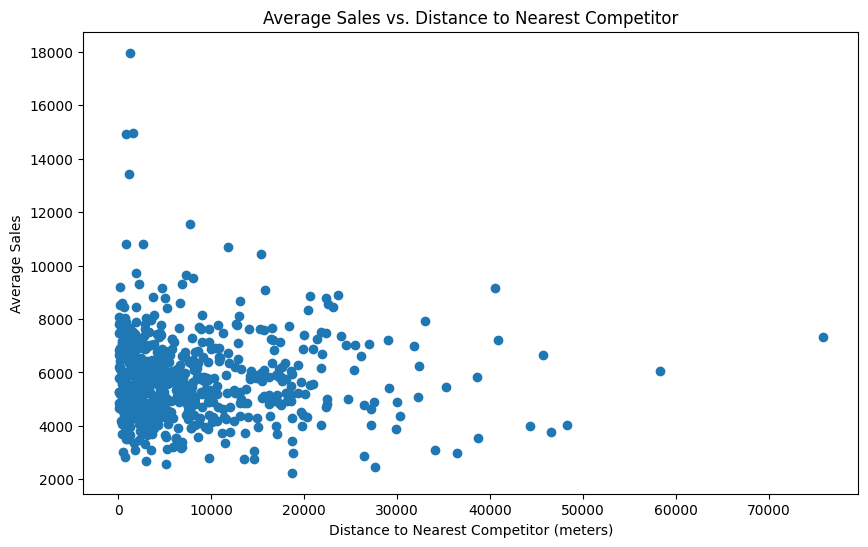

In [38]:
store_df = pd.read_csv('store.csv')

# Load the training data
train_df = pd.read_csv('train.csv')

# Merge the DataFrames on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store')

# Group by Competition Distance and calculate average sales
average_sales_by_distance = merged_df.groupby('CompetitionDistance')['Sales'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_sales_by_distance.index, average_sales_by_distance.values)

# Add labels and title
plt.xlabel('Distance to Nearest Competitor (meters)')
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Distance to Nearest Competitor')

# Show the plot
plt.show()

In [48]:
store_df = pd.read_csv('store.csv')

# Load the training data
train_df = pd.read_csv('train.csv')

# Merge the DataFrames on the 'Store' column
merged_df = pd.merge(train_df, store_df, on='Store')

# Group by Store and Date to identify changes in CompetitionDistance
grouped_df = merged_df.groupby(['Store', 'Date'])['CompetitionDistance'].agg(['first', 'last'])

# Filter for stores where CompetitionDistance changed from NaN to a value
affected_stores = grouped_df[
    (grouped_df['first'].isna()) & (~grouped_df['last'].isna())
].index.get_level_values('Store').unique()

# Analyze sales for these stores
for store in affected_stores:
    store_sales = merged_df[merged_df['Store'] == store]
    
    # Create a figure and axes for the plot
    plt.figure(figsize=(10, 6))
    plt.plot(store_sales['Date'], store_sales['Sales'], label='Sales')

    # Add a vertical line to mark the opening of the competitor
    first_distance = store_sales['CompetitionDistance'].iloc[0]
    if pd.isna(first_distance):
        # Find the first non-NaN value for CompetitionDistance
        first_non_nan_index = store_sales['CompetitionDistance'].first_valid_index()
        if first_non_nan_index is not None:
            opening_date = store_sales['Date'].iloc[first_non_nan_index]
            plt.axvline(x=opening_date, color='red', linestyle='--', label='Competitor Opening')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales for Store {store}')
    plt.legend()

    # Show the plot
    plt.show()

C:\Users\khan\AppData\Local\Temp\ipykernel_13564\471185736.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')
